In [19]:
# Import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
import os

In [20]:
# Menghubungkan Colab dengan Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [21]:
# membaca file csv menggunakan pandas
df = pd.read_csv('/content/gdrive/MyDrive/Praktikum02/Praktikum6/data/breast_cancer_wisconsin.csv')

In [22]:
# Info dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [23]:
# Menampilkan statistika deskriptif dari dataset
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


Eksplorasi Data

In [24]:
print("\nJenis diagnosis unik:", df['diagnosis'].unique())
print("\nJumlah data per kelas:")
print(df['diagnosis'].value_counts())


Jenis diagnosis unik: ['M' 'B']

Jumlah data per kelas:
diagnosis
B    357
M    212
Name: count, dtype: int64


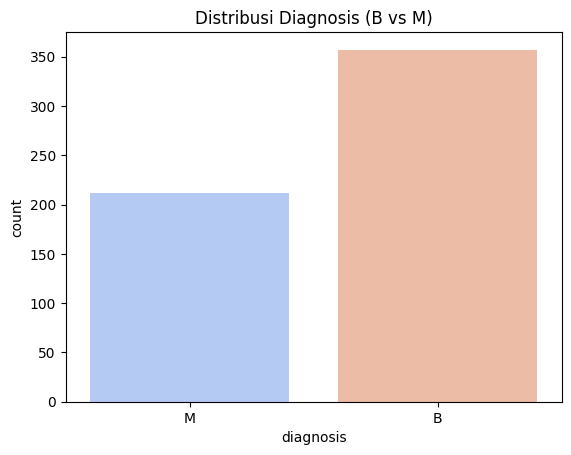

In [25]:
# Visualisasi distribusi kelas
sns.countplot(x='diagnosis', hue='diagnosis', data=df, palette='coolwarm', legend=False)
plt.title('Distribusi Diagnosis (B vs M)')
plt.show()

Preprocessing Data

In [26]:
# Ubah diagnosis (M=Malignant, B=Benign) menjadi numerik (1 dan 0)
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])

In [27]:
# Pisahkan fitur (X) dan label (y)
X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1, errors='ignore')
y = df['diagnosis']

In [28]:
# Normalisasi fitur agar skala datanya seragam
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print("Jumlah fitur:", X.shape[1])

Jumlah fitur: 30


In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print(f"Jumlah data latih: {len(X_train)}")
print(f"Jumlah data uji   : {len(X_test)}")

Jumlah data latih: 455
Jumlah data uji   : 114


In [30]:
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

SVC(random_state=42)

In [31]:
y_pred = model.predict(X_test)

#akurasi
print(f"Akurasi: {accuracy_score(y_test, y_pred) * 100:.2f}%")
#laporan klasifikasi
print("\nLaporan Klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 97.37%

Laporan Klasifikasi:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



In [32]:
# Simpan model ke folder model/
os.makedirs('/content/gdrive/MyDrive/Praktikum02/Praktikum6/model', exist_ok=True)
joblib.dump(model, '/content/gdrive/MyDrive/Praktikum02/Praktikum6/model/svm_breast_cancer.pkl')

['/content/gdrive/MyDrive/Praktikum02/Praktikum6/model/svm_breast_cancer.pkl']


Akurasi Model: 0.9737

📋 Classification Report:
              precision    recall  f1-score   support

      Benign       0.97      0.99      0.98        71
   Malignant       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



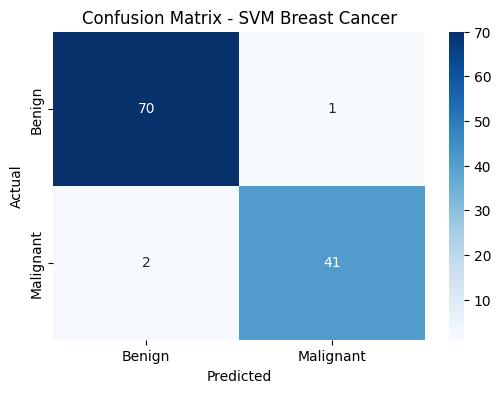

In [33]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAkurasi Model: {accuracy:.4f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malignant']))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d',
            xticklabels=['Benign','Malignant'],
            yticklabels=['Benign','Malignant'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - SVM Breast Cancer')
plt.show()

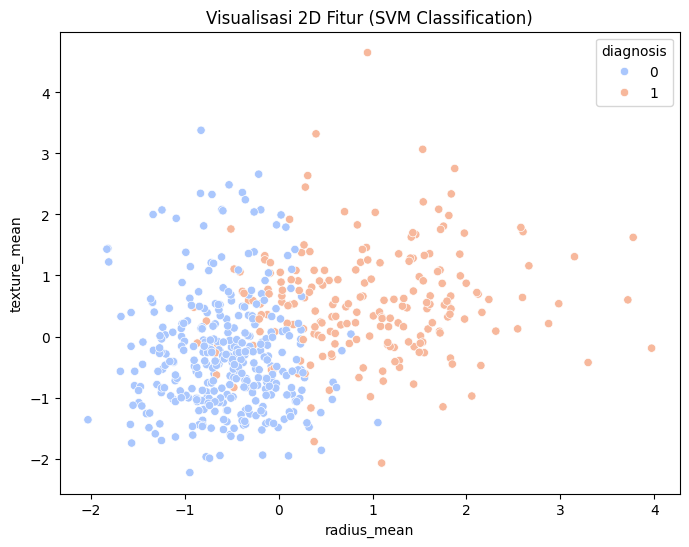

In [34]:
# Visualisasi data
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=y, palette='coolwarm')
plt.title('Visualisasi 2D Fitur (SVM Classification)')
plt.xlabel('radius_mean')
plt.ylabel('texture_mean')
plt.show()

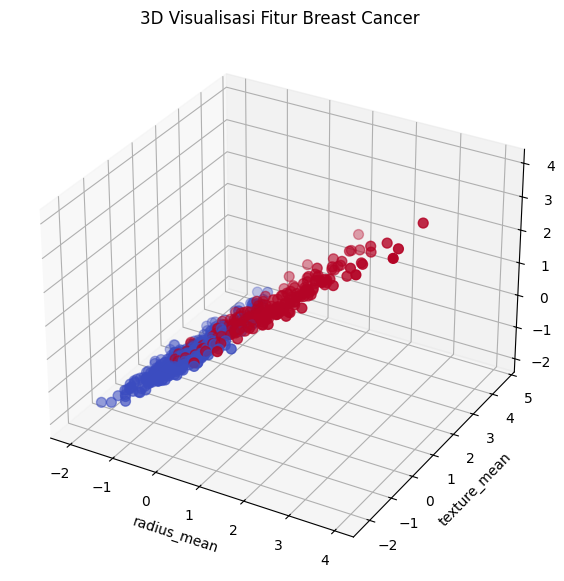

In [35]:
from mpl_toolkits.mplot3d import Axes3D

# Ambil tiga fitur pertama buat visualisasi 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(
    X_scaled[:, 0],  # radius_mean
    X_scaled[:, 1],  # texture_mean
    X_scaled[:, 2],  # perimeter_mean
    c=y, cmap='coolwarm', s=50
)

ax.set_xlabel('radius_mean')
ax.set_ylabel('texture_mean')
ax.set_zlabel('perimeter_mean')
ax.set_title('3D Visualisasi Fitur Breast Cancer')
plt.show()


In [36]:
%cd /content/gdrive/MyDrive/Praktikum02/Praktikum6

/content/gdrive/MyDrive/Praktikum02/Praktikum6


In [37]:
!git init

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/gdrive/MyDrive/Praktikum02/Praktikum6/.git/


In [38]:
!git branch -M main